<a href="https://colab.research.google.com/github/ygarg31081998/DeployModel/blob/main/Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [110]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error as mae
from random import randint
import random

def plot_series(time, series, format="-", start=0, end=None):
    plt.plot(time[start:end], series[start:end], format)
    plt.xlabel("Time")
    plt.ylabel("Value")
    plt.grid(True)

def trend(time, slope=0):
    return slope * time

def seasonal_pattern(season_time):
    """Just an arbitrary pattern, you can change it if you wish"""
    return np.where(season_time < 0.4,
                    np.cos(season_time * 2 * np.pi),
                    1 / np.exp(3 * season_time))

def seasonality(time, period, amplitude=1, phase=0):
    """Repeats the same pattern at each period"""
    season_time = ((time + phase) % period) / period
    return amplitude * seasonal_pattern(season_time)

def noise(time, noise_level=1, seed=None):
    rnd = np.random.RandomState(seed)
    return rnd.randn(len(time)) * noise_level

def moving_average_forecast(series, window_size):
  forecast = []
  for time in range(len(series) - window_size):
    forecast.append(series[time:time + window_size].mean(axis = 0))
  return np.array(forecast)

def predict_sales(dataset, seasonality=12, window_size=24, duration=1):
    dataset_length = len(dataset)
    if(dataset_length <= seasonality):
        meanValue = dataset.mean(axis = 0)
        return np.full((duration, 1), meanValue, dtype=int)
       
    diff_series = (dataset[seasonality:] - dataset[:-seasonality])
    diff_moving_avg = moving_average_forecast(diff_series, window_size)[dataset_length - seasonality - window_size-duration:]
    diff_moving_avg_plus_past = dataset[dataset_length - duration - seasonality:-seasonality] + diff_moving_avg
    return diff_moving_avg_plus_past

def generate_synthetic_Data(time, enteries, products, store):
    dataset = np.arange(enteries * products * stores).reshape(enteries, products * stores)
    for column in range(products * stores):
      if column == products * stores - 1:
        dataset[:,column] = randint(100, 140) - trend(time, random.random()) - seasonality(time, period=12, amplitude=randint(20, 50)) + noise(time, randint(1,5), seed=42)
      else :
        dataset[:, column] = randint(40, 100) + trend(time, random.random()) + seasonality(time, period=12, amplitude=randint(20, 50)) + noise(time, randint(1,5), seed=42)
    
    return dataset.astype(int)

def visualise(predictions):
    product_to_show = 10
    plt.figure(figsize=(10, 6))
    plot_series(time_train, dataset_train[:, product_to_show])
    plot_series(time_valid, predictions[:,product_to_show])
    plt.show()


def validate_model(seasonality=12, window_size=24):
    product_to_show = 10
    # Seasonality is of 1 year so taking difference by subtracting the last year values
    diff_series = (dataset[seasonality:] - dataset[:-seasonality])

    #moving average
    diff_moving_avg = moving_average_forecast(diff_series, window_size)[split_time - seasonality - window_size:]

    plt.figure(figsize=(10, 6))
    plot_series(time_valid, diff_series[split_time - seasonality:, product_to_show])
    plot_series(time_valid, diff_moving_avg[:, product_to_show])
    plt.show()

    #adding moving average with the last year value
    predictions = dataset[split_time - seasonality:-seasonality] + diff_moving_avg

    plt.figure(figsize=(10, 6))
    plot_series(time_valid, dataset_valid[:,product_to_show])
    plot_series(time_valid, predictions[:,product_to_show])
    plt.show()

    # finding the mean absolute error
    error = mae(dataset_valid[:, product_to_show], predictions[:, product_to_show])
    print("Mean absolute error for a product is: %f" %(error))

    #visualize the result 
    visualise(predictions)



enteries = 60
products = 5
stores = 3

time = np.arange(enteries, dtype="float32")
dataset = generate_synthetic_Data(time, enteries, products, stores)
split_time = int(enteries * 0.8)
time_train = time[:split_time]
dataset_train = dataset[:split_time]
time_valid = time[split_time:]
dataset_valid = dataset[split_time:]
window_size = 12


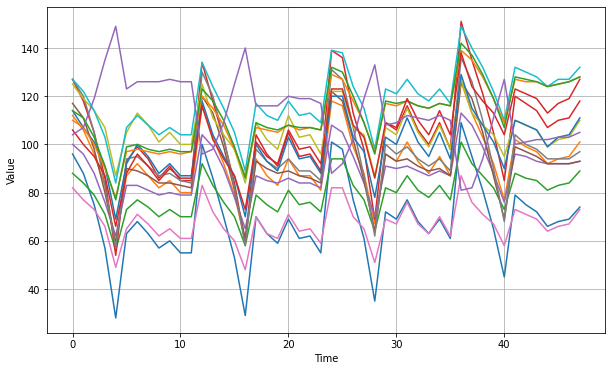

In [111]:
plt.figure(figsize=(10, 6))
plot_series(time_train, dataset_train)

In [112]:
print(dataset.shape)
print(dataset_train.shape)
print(dataset_valid.shape)

(60, 15)
(48, 15)
(12, 15)


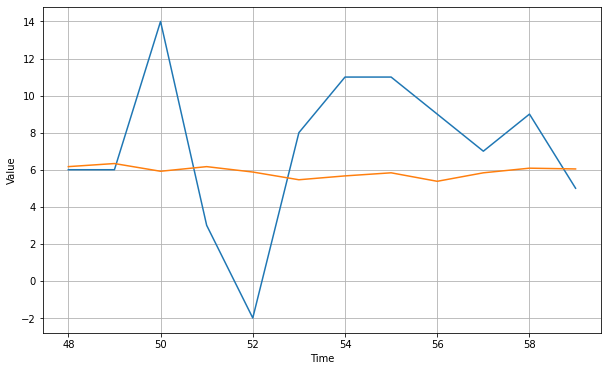

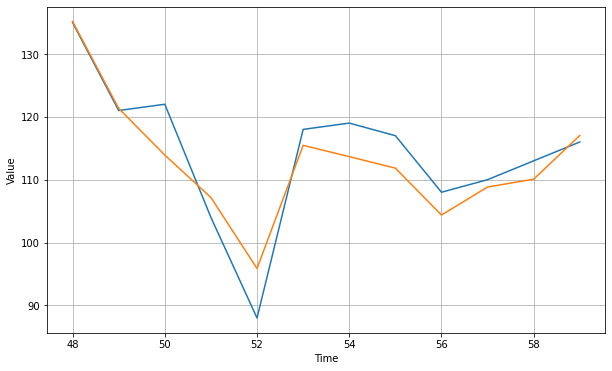

Mean absolute error for a product is: 3.451389


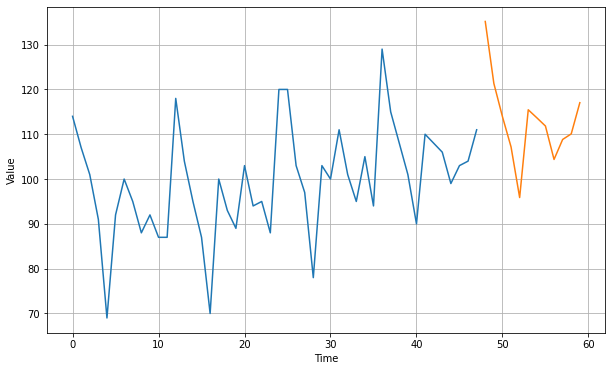

In [113]:
validate_model()

In [114]:
# predicting the next month sale
output = predict_sales(dataset).astype(int)
print(output.shape)

(1, 15)
